## Laboratory Assignment 1 
#### Implementing Spiking Neurons using Izhikevich's Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint
import types

from types import MethodType

from izhikievich import Izhikievich

In [2]:
params={
    'a':0.02,
    'b':0.2,
    'c':-65,
    'd':6,
    'V':-70,  # Initial membrane potential
    'tau':0.25,  # Time step
    'i':14
}

##### Tonic spiking

In [3]:
tspan = np.arange(0, 100 + params["tau"], params["tau"])  # Time span
T1 = tspan[-1] / 10  # Time after which the input current changes

izhi = Izhikievich(tspan, T1, **params)
VV, uu = izhi.simulation()

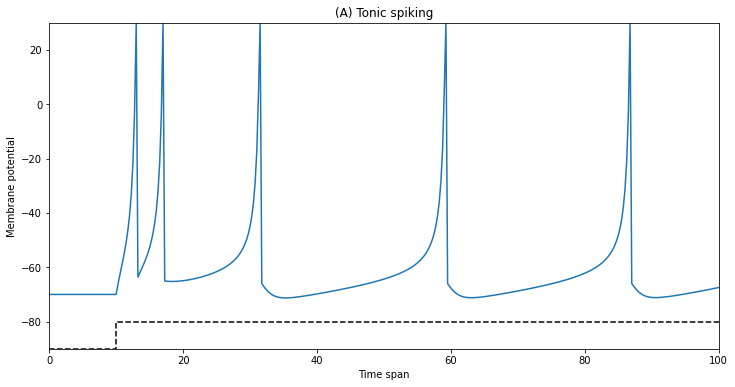

In [4]:
feature_name="(A) Tonic spiking"
izhi.plotting(VV, uu, feature_name)

##### Phasic spiking

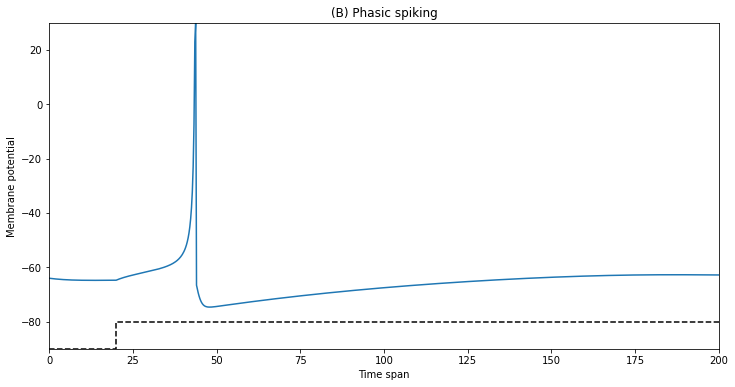

In [5]:
params['b']=0.25
params['V']=-64
params['i']=0.5

tspan = np.arange(0, 200 + params["tau"], params["tau"])  # Time span
T1 = 20  # Time after which the input current changes

#VV, uu = simulation(tspan,T1,**params)
izhi = Izhikievich(tspan, T1, **params)
VV, uu = izhi.simulation()

feature_name="(B) Phasic spiking"
#plotting(tspan,T1,VV,uu,feature_name)
izhi.plotting(VV, uu, feature_name)

##### Tonic bursting

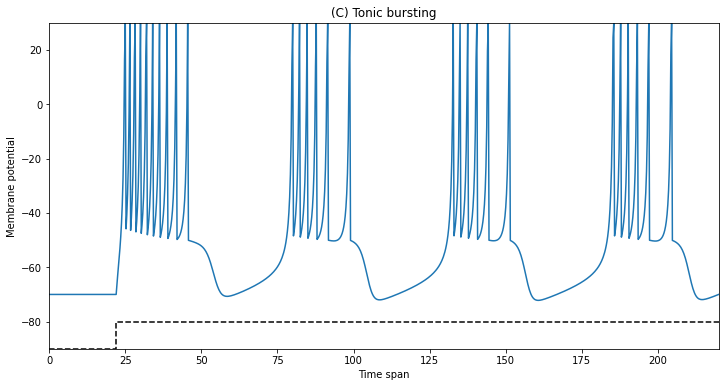

In [6]:
params['b']=0.2
params['c']=-50
params['d']=2
params['V']=-70
params['i']=15

tspan = np.arange(0, 220 + params["tau"], params["tau"])  # Time span
T1 = 22  # Time after which the input current changes

#VV, uu = simulation(tspan,T1,**params)
izhi = Izhikievich(tspan, T1, **params)
VV, uu = izhi.simulation()

feature_name="(C) Tonic bursting"
#plotting(tspan,T1,VV,uu,feature_name)
izhi.plotting(VV, uu, feature_name)

##### Phasic bursting

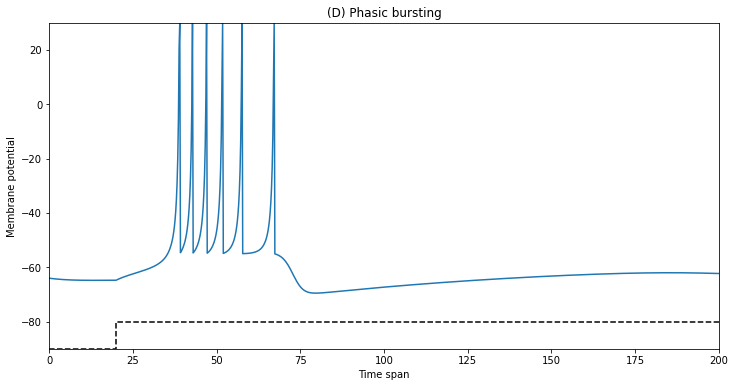

In [7]:
params['b']=0.25
params['c']=-55
params['d']=0.05
params['V']=-64
params['tau']=0.2
params['i']=0.6

tspan = np.arange(0, 200 + params["tau"], params["tau"])  # Time span
T1 = 20  # Time after which the input current changes

#VV, uu = simulation(tspan,T1,**params)
izhi = Izhikievich(tspan, T1, **params)
VV, uu = izhi.simulation()

feature_name="(D) Phasic bursting"
izhi.plotting(VV, uu, feature_name) #plotting(tspan,T1,VV,uu,feature_name)

##### Mixed mode

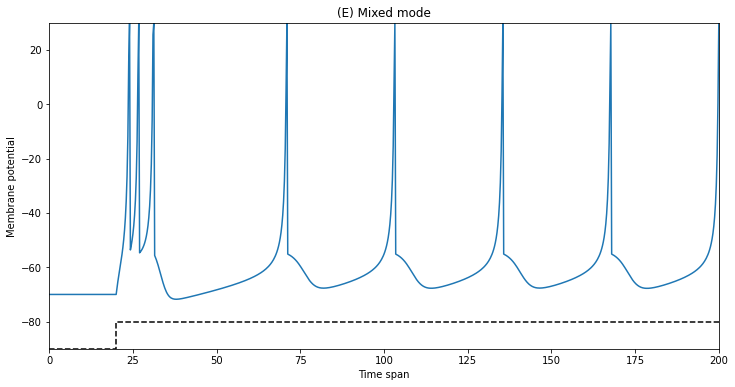

In [8]:
params['b']=0.2
params['d']=4
params['V']=-70
params['tau']=0.25
params['i']=10

tspan = np.arange(0, 200 + params["tau"], params["tau"])  # Time span
T1 = 20  # Time after which the input current changes

#VV, uu = simulation(tspan,T1,**params)
izhi = Izhikievich(tspan, T1, **params)
VV, uu = izhi.simulation()

feature_name="(E) Mixed mode"
izhi.plotting(VV, uu, feature_name)
#plotting(tspan,T1,VV,uu,feature_name)

##### (F) Spike frequency adaptation

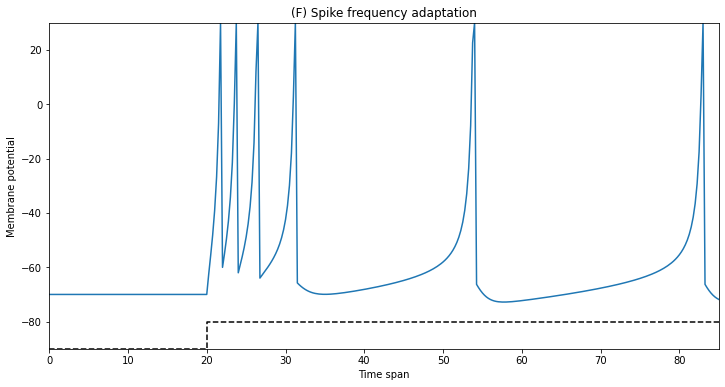

In [9]:
params['a']=0.01
params['c']=-65
params['d']=8
params['i']=30

tspan = np.arange(0, 85 + params["tau"], params["tau"])  # Time span
T1 = 20  # Time after which the input current changes

#VV, uu = simulation(tspan,T1,**params)
izhi = Izhikievich(tspan, T1, **params)
VV, uu = izhi.simulation()

feature_name="(F) Spike frequency adaptation"
izhi.plotting(VV, uu, feature_name) #plotting(tspan,T1,VV,uu,feature_name)

##### Class 1 excitable

In [10]:
params['a']=0.02
params['b']=-0.1
params['c']=-55
params['d']=6
params['V']=-60
params['i']=0.075

# Here you might want to try and add a property to the class correspondent to II and add operations for it!!! 
#It needs to be updated with VV and uu
#How to add things to the izhikievich model in the class? idk

tspan = np.arange(0, 300 + params["tau"], params["tau"])  # Time span
T1 = 30  # Time after which the input current changes

izhi = Izhikievich(tspan, T1, **params)
# izhi.ii = property(lambda self: self.i*-90)

setattr(izhi, 'ii', True)
setattr(izhi, 'diffV', True)

def newI(self, t):
    return 0.075 * (t - self.T1) if t > self.T1 else 0

izhi.calculate_I = types.MethodType(newI, izhi)

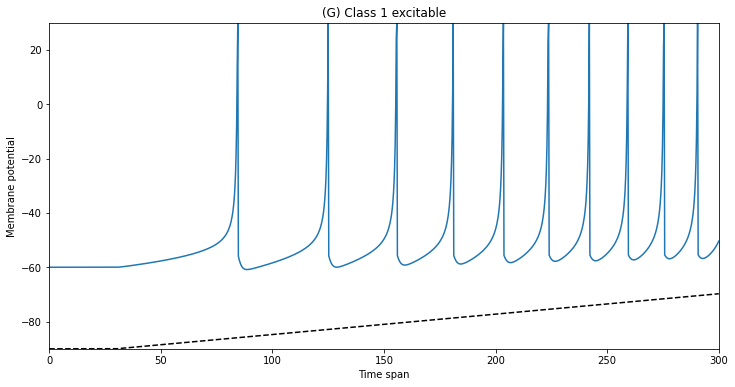

In [11]:
VV, uu = izhi.simulation()

feature_name="(G) Class 1 excitable"
izhi.plotting(VV, uu, feature_name)

##### Class 2 excitable

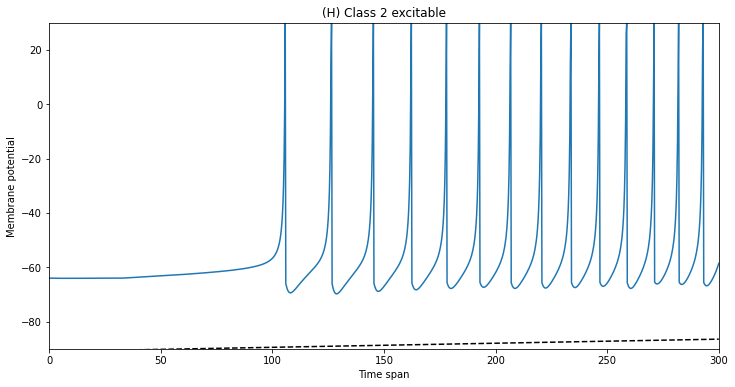

In [12]:
params['a']=0.2
params['b']=0.26
params['c']=-65
params['d']=0
params['V']=-64
params['i']=-0.5

izhi = Izhikievich(tspan, T1, **params)
setattr(izhi, 'ii', True)
# setattr(izhi, 'i_coef', True)

def newI(self, t):
    return self.i + (0.015 * (t-self.T1)) if t > self.T1 else self.i

izhi.calculate_I = types.MethodType(newI, izhi)

VV, uu = izhi.simulation()

feature_name="(H) Class 2 excitable"
izhi.plotting(VV, uu, feature_name)

##### Spike Latency

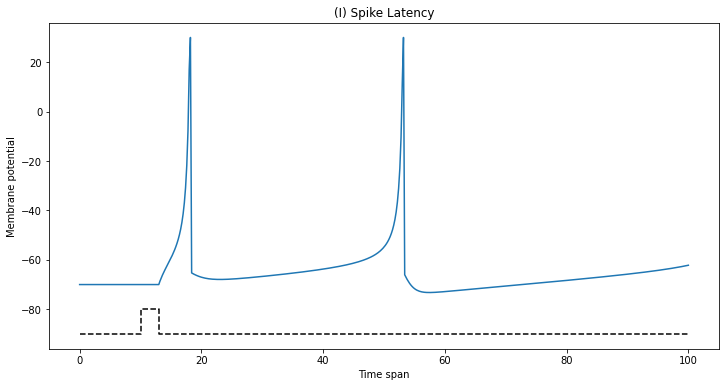

In [13]:
params['a']=0.02
params['b']=0.2
params['d']=6
params['V']=-70
params['tau']=0.2
params['i']=7.04

params['additional']=3


tspan = np.arange(0, 100 + params["tau"], params["tau"])  # Time span
T1 = tspan[-1] / 10  # Time after which the input current changes

izhi = Izhikievich(tspan, T1, **params)

VV, uu = izhi.simulation()

II = [-90, -90, -80, -80, -90, -90] # Input current for plotting

feature_name="(I) Spike Latency"

# x_vals = [0, self.T1, self.T1, self.T1+self.additional, self.T1+self.additional, max(self.tspan)]
izhi.plotII(VV, uu, II, feature_name)


##### Subthreshold oscillations

In [14]:
params['a']=0.05
params['b']=0.26
params['c']=-60
params['d']=0
params['V']=-62
params['tau']=0.25
params['i']=2

params['additional']=5


tspan = np.arange(0, 200 + params["tau"], params["tau"])  


izhi = Izhikievich(tspan, T1, **params)
# VV, uu = izhi.simulation_and()

def newI(self, t):
    if (t > self.T1 and t < self.T1+self.additional):
        return self.i 
    else:
        return 0

def x_vals(self):
    return [0, self.T1, self.T1, self.T1+5, self.T1+5, max(self.tspan)]


izhi.calculate_I = types.MethodType(newI, izhi)
izhi.x_values = types.MethodType(x_vals, izhi)

VV, uu = izhi.simulation()


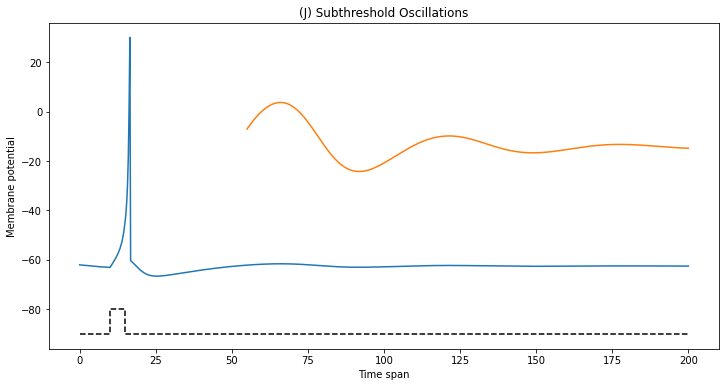

In [15]:
feature_name="(J) Subthreshold Oscillations"
setattr(izhi, 'zoom', 'True')

izhi.plotII(VV, uu, II, feature_name)

# del izhi.zoom

##### Resonator

In [16]:
params['a']=0.1
params['d']=-1
params['i']=0.65

params['additional']=0

params['t2'] = 20
params['t4'] = 40

tspan = np.arange(0, 400 + params["tau"], params["tau"])  


izhi = Izhikievich(tspan, T1, **params)


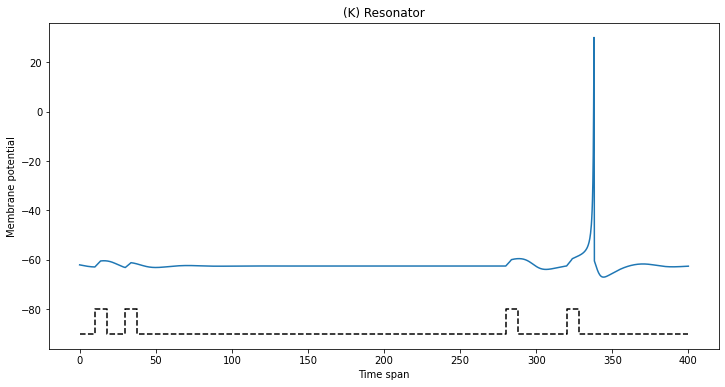

In [17]:
def newI(self, t):
    if ((t>self.T1) and (t < self.T1+4)) or ((t>self.T2) and (t < self.T2+4)) or ((t>self.T3) and (t < self.T3+4)) or ((t>self.T4) and (t < self.T4+4)):
        return self.i
    else:
        return 0

def x_vals(self):
    return [0, self.T1, self.T1, self.T1+8, self.T1+8, self.T2, self.T2, self.T2+8, self.T2+8, self.T3, self.T3, self.T3+8, self.T3+8, self.T4, self.T4, self.T4+8, self.T4+8, max(self.tspan)]

izhi.calculate_I = types.MethodType(newI, izhi)
izhi.x_values = types.MethodType(x_vals, izhi)


VV, uu = izhi.simulation()

feature_name="(K) Resonator"
II = [-90, -90, -80, -80, -90, -90, -80,-80, -90,-90, -80,-80, -90,-90, -80,-80, -90,-90] # Input current for plotting
izhi.plotII(VV, uu, II, feature_name)

##### Integrator

In [18]:
params['a']=0.02
params['b']=-0.1
params['c']=-55
params['d']=6
params['V']=-60
params['i']=9

params['t2'] = 5
params['t4'] = 10


tspan = np.arange(0, 400 + params["tau"], params["tau"])
T1 = tspan[-1] / 11  # Time after which the input current changes


izhi = Izhikievich(tspan, T1, **params)

setattr(izhi, 'diffV', True)


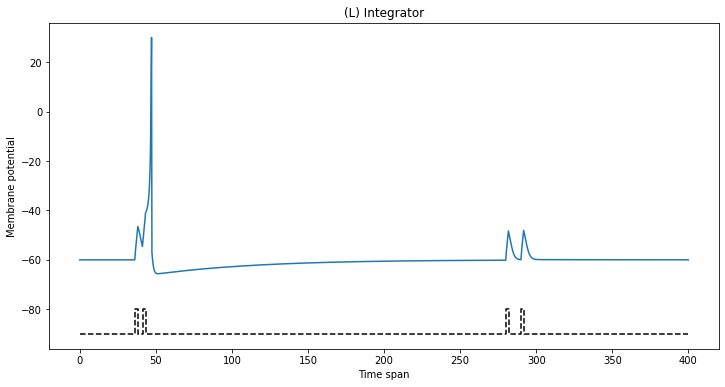

In [19]:
def newI(self, t):
    if ((t>self.T1) and (t < self.T1+2)) or ((t>self.T2) and (t < self.T2+2)) or ((t>self.T3) and (t < self.T3+2)) or ((t>self.T4) and (t < self.T4+2)): 
        return self.i
    else:
        return 0

def x_vals(self):
    return [0, self.T1, self.T1, self.T1+2, self.T1+2, self.T2, self.T2, self.T2+2, self.T2+2, self.T3, self.T3, self.T3+2, self.T3+2, self.T4, self.T4, self.T4+2, self.T4+2, max(self.tspan)]

izhi.calculate_I = types.MethodType(newI, izhi)
izhi.x_values = types.MethodType(x_vals, izhi)


VV, uu = izhi.simulation()

feature_name="(L) Integrator"
# II = [-90, -90, -80, -80, -90, -90, -80,-80, -90,-90, -80,-80, -90,-90, -80,-80, -90,-90] # Input current for plotting
izhi.plotII(VV, uu, II, feature_name)

##### Rebound Spike

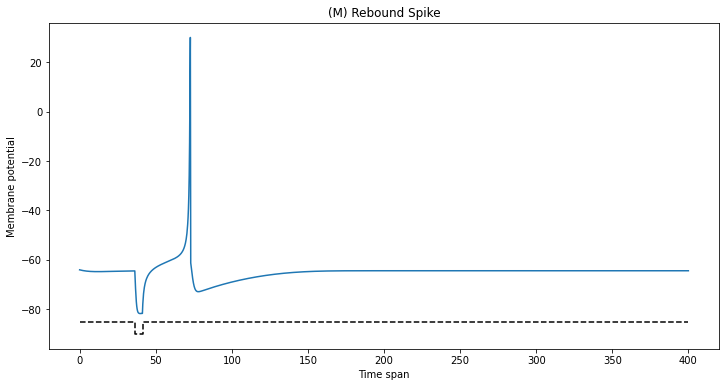

In [20]:
params['a']=0.03
params['b']=0.25
params['c']=-60
params['d']=4
params['V']=-64
params['i']=-15

params['t2'] = 5
params['t4'] = 10

izhi = Izhikievich(tspan, T1, **params)

def reboundI(self, t):
    if (t>self.T1) and (t < self.T1+5):
        return self.i
    else:
        return 0

def reboundX(self):
    return [0, self.T1, self.T1, self.T1+5, self.T1+5, max(self.tspan)]

izhi.calculate_I = types.MethodType(reboundI, izhi)
izhi.x_values = types.MethodType(reboundX, izhi)


VV, uu = izhi.simulation()

feature_name="(M) Rebound Spike"
II = [-85, -85, -90, -90, -85,-85] # Input current for plotting
izhi.plotII(VV, uu, II, feature_name)


##### Rebound Burst

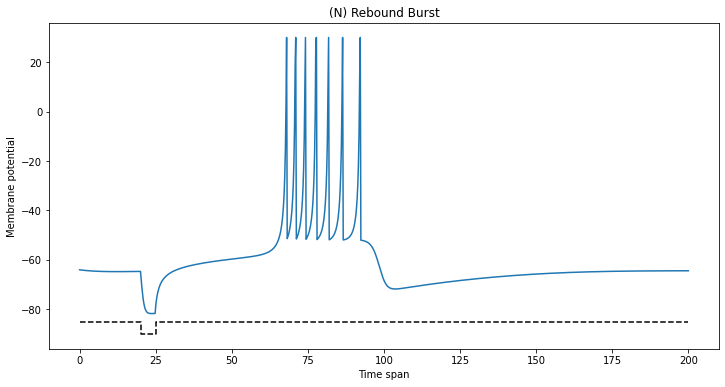

In [21]:
params['c']=-52
params['d']=0
params['tau']=0.2

tspan = np.arange(0, 200 + params["tau"], params["tau"])
T1 = 20

izhi = Izhikievich(tspan, T1, **params)

izhi.calculate_I = types.MethodType(reboundI, izhi)
izhi.x_values = types.MethodType(reboundX, izhi)

VV, uu = izhi.simulation()

feature_name="(N) Rebound Burst"
# II = [-85, -85, -90, -90, -85,-85] # Input current for plotting
izhi.plotII(VV, uu, II, feature_name)


##### Threshold variability

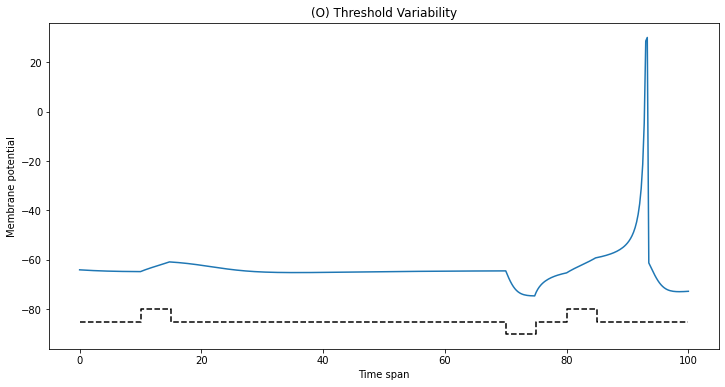

In [22]:
params['c']=-60
params['d']=4
params['tau']=0.25

tspan = np.arange(0, 100 + params["tau"], params["tau"])

izhi = Izhikievich(tspan, T1, **params)


def newI(self, t):
    if ((t>10) and (t < 15)) or ((t>80) and (t < 85)):
        return 1
    elif (t>70) and (t < 75):
        return -6
    else:
        return 0
    

def x_vals(self):
    return [0, 10, 10, 15, 15, 70, 70, 75, 75, 80, 80, 85, 85, max(self.tspan)]
    
izhi.calculate_I = types.MethodType(newI, izhi)
izhi.x_values = types.MethodType(x_vals, izhi)


VV, uu = izhi.simulation()

feature_name="(O) Threshold Variability"
II = [-85, -85, -80, -80, -85, -85, -90, -90,-85, -85, -80, -80, -85,-85] # Input current for plotting
izhi.plotII(VV, uu, II, feature_name)


#####  Bistability

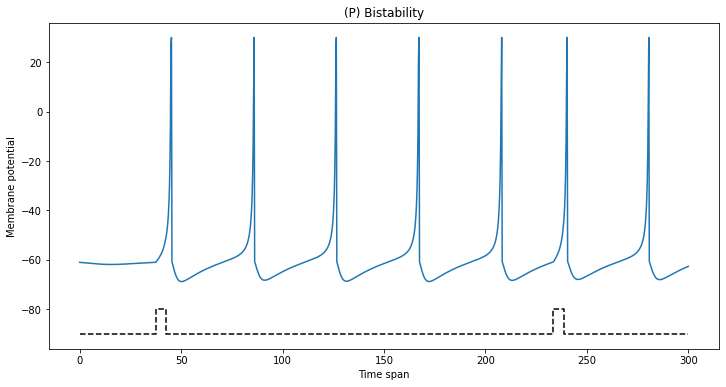

In [23]:
params['a']=0.1
params['b']=0.26
params['d']=0
params['V']=-61
params['t2'] = 196

tspan = np.arange(0, 300 + params["tau"], params["tau"])
T1 = tspan[-1]/8

izhi = Izhikievich(tspan, T1, **params)

def newI(self, t):
    if ((t>self.T1) and (t < self.T1+5)) or ((t>self.T2) and (t < self.T2+5)):
        return 1.24
    else:
        return 0.24
    
def x_vals(self):
    return [0, self.T1, self.T1, self.T1+5, self.T1+5, self.T2, self.T2, self.T2+5, self.T2+5, max(self.tspan)]

izhi.calculate_I = types.MethodType(newI, izhi)
izhi.x_values = types.MethodType(x_vals, izhi)

VV, uu = izhi.simulation()

feature_name="(P) Bistability"
II = [-90, -90, -80, -80, -90, -90, -80, -80, -90, -90] # Input current for plotting
izhi.plotII(VV, uu, II, feature_name)

#####  Depolarising After-Potential

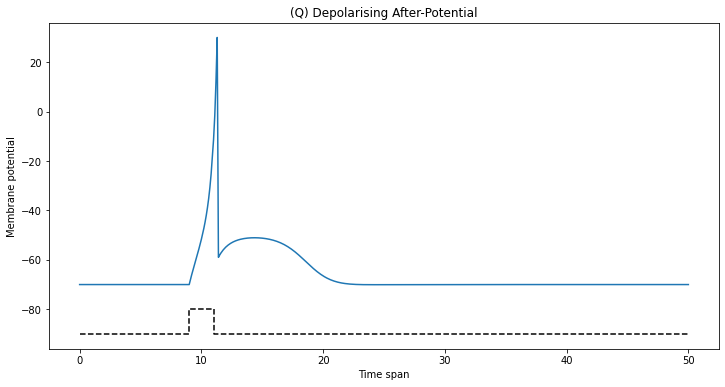

In [24]:
params['a']=1
params['b']=0.2
params['d']=-21
params['V']=-70
params['tau']=0.1
params['i']=20

tspan = np.arange(0, 50 + params["tau"], params["tau"])
T1 = 10

izhi = Izhikievich(tspan, T1, **params)

def newI(self, t):
    if np.abs(t-T1)<1:
        return self.i
    else:
        return 0
    
def x_vals(self):
    return [0, self.T1-1, self.T1-1, self.T1+1, self.T1+1, max(self.tspan)]

izhi.calculate_I = types.MethodType(newI, izhi)
izhi.x_values = types.MethodType(x_vals, izhi)

VV, uu = izhi.simulation()

feature_name="(Q) Depolarising After-Potential"
II = [-90, -90, -80, -80, -90, -90] # Input current for plotting
izhi.plotII(VV, uu, II, feature_name)


#####  Accomodation

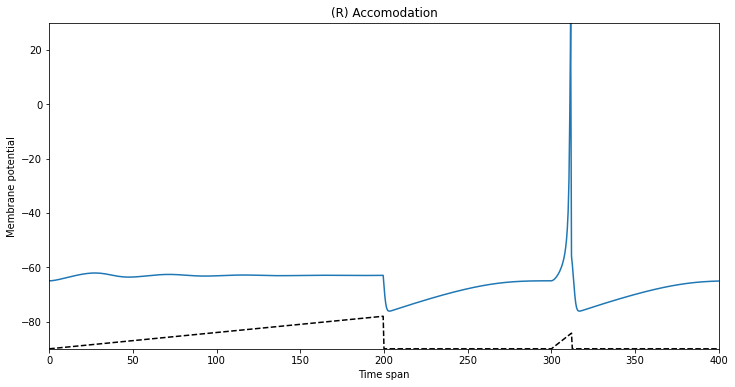

In [25]:
params['a']=0.02
params['b']=1
params['c']=-55
params['d']=4
params['V']=-65
params['tau']=0.5


tspan = np.arange(0, 400 + params["tau"], params["tau"])

izhi = Izhikievich(tspan, T1, **params)

setattr(izhi, 'acc', True)

def newI(self, t):
    if (t < 200):
        return t / 25
    elif t < 300:
        return 0
    elif  t < 312.5:
        return (t-300) / 12.5 * 4
    else:
        return 0
    
izhi.calculate_I = types.MethodType(newI, izhi)

VV, uu = izhi.simulation()

feature_name="(R) Accomodation"
izhi.plotting(VV, uu, feature_name)


#####  Inhibition induced spiking

In [26]:
params

{'a': 0.02,
 'b': 1,
 'c': -55,
 'd': 4,
 'V': -65,
 'tau': 0.5,
 'i': 20,
 'additional': 0,
 't2': 196,
 't4': 10}

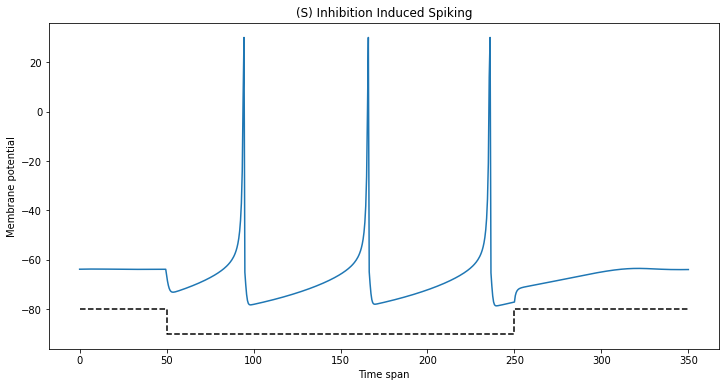

In [27]:
params['a']=params['a']*-1
params['b']=params['b']*-1
params['c']=-60
params['d']=8
params['V']=-63.8
# params['i']=80


tspan = np.arange(0, 350 + params["tau"], params["tau"])

izhi = Izhikievich(tspan, T1, **params)

def inhibI(self, t):
    if (t < 50) or (t>250):
        return 80
    else:
        return 75
    
def inhibX(self):
    return [0, 50, 50, 250, 250, max(self.tspan)]

izhi.calculate_I = types.MethodType(inhibI, izhi)
izhi.x_values = types.MethodType(inhibX, izhi)
VV, uu = izhi.simulation()

feature_name="(S) Inhibition Induced Spiking"
II = [-80, -80, -90, -90, -80, -80] 
izhi.plotII(VV, uu, II, feature_name)


##### Inhibition induced bursting

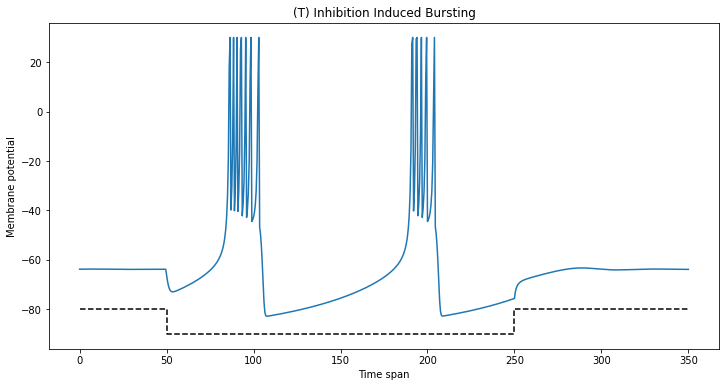

In [28]:
params['a']=-0.026
params['c']=-45
params['d']=-2

izhi = Izhikievich(tspan, T1, **params)

izhi.calculate_I = types.MethodType(inhibI, izhi)
izhi.x_values = types.MethodType(inhibX, izhi)
VV, uu = izhi.simulation()

feature_name="(T) Inhibition Induced Bursting"
izhi.plotII(VV, uu, II, feature_name)